<a href="https://colab.research.google.com/github/Kaine-UCF/Artificial-Intelligence/blob/master/HW2/A_I2CFINISHED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNDEFIT MODEL

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 4s 88us/sample - loss: 2.0301 - acc: 0.2298 - val_loss: 1.9359 - val_acc: 0.2654
Epoch 2/4
50000/50000 [==============================] - 4s 86us/sample - loss: 1.9262 - acc: 0.2791 - val_loss: 1.8963 - val_acc: 0.2895
Epoch 3/4
50000/50000 [==============================] - 4s 85us/sample - loss: 1.8991 - acc: 0.3028 - val_loss: 1.8885 - val_acc: 0.2993
Epoch 4/4
10000/10000 [==============================] - 1s 57us/sample - loss: 1.8688 - acc: 0.3104
Test accuracy: 0.3104


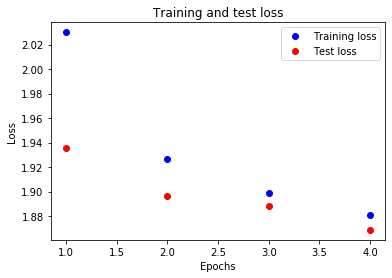

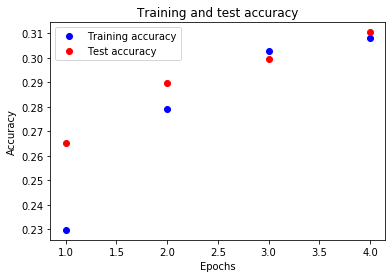

In [0]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

train_images = train_images / 255.0
test_images = test_images / 255.0
'''
The discrepancy between the testing and training accuracy is low (~.23%).
Despite this, the models low overall accuracy(~31%), illustrates that it is underfitting.
'''
goodModel = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
goodModel.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 4
history = goodModel.fit(train_images, 
                    train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))
test_loss, test_acc = goodModel.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


OVERFIT MODEL

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 5s 101us/sample - loss: 1.6549 - acc: 0.4074 - val_loss: 1.4869 - val_acc: 0.4721
Epoch 2/8
50000/50000 [==============================] - 5s 98us/sample - loss: 1.3544 - acc: 0.5200 - val_loss: 1.3942 - val_acc: 0.5098
Epoch 3/8
50000/50000 [==============================] - 5s 98us/sample - loss: 1.1938 - acc: 0.5749 - val_loss: 1.3650 - val_acc: 0.5202
Epoch 4/8
50000/50000 [==============================] - 5s 99us/sample - loss: 1.0545 - acc: 0.6228 - val_loss: 1.3921 - val_acc: 0.5239
Epoch 5/8
50000/50000 [==============================] - 5s 100us/sample - loss: 0.9220 - acc: 0.6703 - val_loss: 1.4241 - val_acc: 0.5240
Epoch 6/8
50000/50000 [==============================] - 5s 101us/sample - loss: 0.7970 - acc: 0.7147 - val_loss: 1.4939 - val_acc: 0.5269
Epoch 7/8
50000/50000 [==============================] - 5s 100us/sample - loss: 0.6809 - acc: 0.7583 - val_loss: 1.688

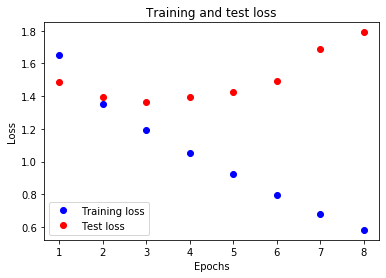

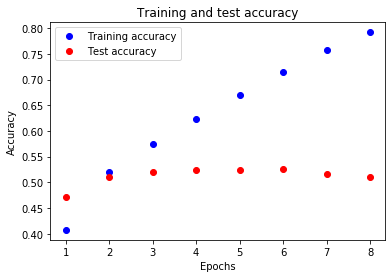

In [0]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

train_images = train_images / 255.0
test_images = test_images / 255.0

'''
This model is overfitting. Its weights are optimized for recognizing tranining data (accuracy ~79%),
but fail to get the same results for the testing data (accuracy ~50%).
Note: The "Good Model" will also overfit if ran for over 30 epochs.
'''

#xcant covloute 1d vector
overFitModel = keras.Sequential([
    keras.layers.Conv2D(3,3),
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),

    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
overFitModel.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 8
history = overFitModel.fit(train_images, 
                    train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))
test_loss, test_acc = overFitModel.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


GOOD MODEL

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 27s 538us/sample - loss: 2.1530 - acc: 0.1880 - val_loss: 1.9363 - val_acc: 0.2964
Epoch 2/20
50000/50000 [==============================] - 22s 438us/sample - loss: 1.8472 - acc: 0.3162 - val_loss: 1.5759 - val_acc: 0.4292
Epoch 3/20
50000/50000 [==============================] - 22s 439us/sample - loss: 1.5882 - acc: 0.4182 - val_loss: 1.3967 - val_acc: 0.4991
Epoch 4/20
50000/50000 [==============================] - 22s 434us/sample - loss: 1.4465 - acc: 0.4771 - val_loss: 1.3137 - val_acc: 0.5354
Epoch 5/20
50000/50000 [==============================] - 22s 434us/sample - loss: 1.3474 - acc: 0.5199 - val_loss: 1.1969 - val_acc: 0.5789
Epoch 6/20
50000/50000 [==============================] - 22s 434us/sample - loss: 1.2605 - acc: 0.5538 - val_loss: 1.1369 - val_acc: 0.6006
Epoch 7/20
50000/50000 [==============================] - 22s 434us/sample - loss: 1.1831 - acc: 0.5789 

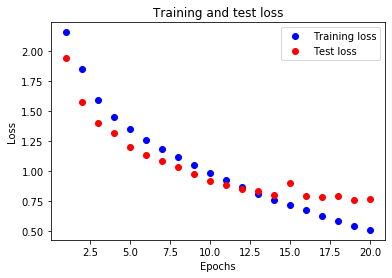

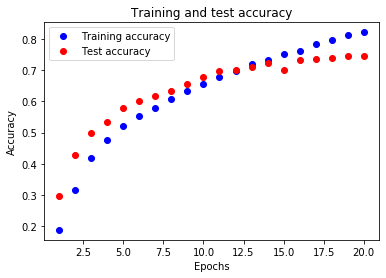

In [0]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

train_images = train_images / 255.0
test_images = test_images / 255.0

'''
This model is pretty good.
It acheives ~75% accuracy after 20 epochs, compared to the keras CNN-Capsule example which acheived
79% after 15 epochs. (https://keras.io/examples/cifar10_cnn_capsule/)
'''
goodModel = keras.Sequential([
    keras.layers.Conv2D(64,(3,3)),
    keras.layers.Dense(864, activation=tf.nn.relu),
    keras.layers.MaxPooling2D(3),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32,(3,3)),
    keras.layers.Dense(288, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),


    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(288, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(96, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


# compile the model
goodModel.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = goodModel.fit(train_images, 
                    train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))
test_loss, test_acc = goodModel.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
